### Importer les packages

In [23]:
import pyforest
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

### Importer les données

In [37]:
Urbanisation_data = pd.read_csv('Urbanization_Data_MML.csv')

<IPython.core.display.Javascript object>

In [38]:
Urbanisation_data= Urbanisation_data.drop(['Unnamed: 0'], axis = 1)

In [39]:
Urbanisation_data.tail()

,region,Date,Effectif de la population,Population rurale,Population urbaine,Taux d'urbanisation,Nombre de ménages ruraux,Nombre de ménages urbains,Taille moyenne des ménages,Taille moyenne des ménages ruraux,Taille moyenne des ménages urbains,risque_déforestation
507,Ziguinchor,2014,565940.00,303344.00,262596.00,46.40,50814.08,40063.58,7.91,9.19,7.95,1
508,Ziguinchor,2015,583528.00,309854.00,273674.00,46.90,50814.08,40063.58,7.91,9.19,7.95,1
509,Ziguinchor,2016,601929.00,317216.00,284713.00,47.30,50814.08,40063.58,7.91,9.19,7.95,1
510,Ziguinchor,2017,621168.00,324250.00,296918.00,47.80,50814.08,40063.58,7.91,9.19,7.95,1
511,Ziguinchor,2018,641254.00,332170.00,309084.00,48.20,50814.08,40063.58,7.91,9.19,7.95,1


### Exploration des données 

In [5]:
pd.set_option("display.float", "{:.2f}".format)
Urbanisation_data.describe()

<IPython.core.display.Javascript object>

,Date,Effectif de la population,Population rurale,Population urbaine,Taux d'urbanisation,Nombre de ménages ruraux,Nombre de ménages urbains,Taille moyenne des ménages,Taille moyenne des ménages ruraux,Taille moyenne des ménages urbains,risque_déforestation
count,512.00,512.00,512.00,512.00,512.00,512.00,512.00,512.00,512.00,512.00,512.00
mean,1994.80,786769.36,463799.61,322712.98,30.05,50814.08,40063.58,7.91,9.19,7.95,0.31
std,14.41,521011.50,234370.01,550205.13,23.56,17966.71,55553.61,0.17,0.73,0.69,0.46
min,1970.00,122333.00,27614.74,20054.00,7.51,2785.35,3867.33,7.42,7.00,6.10,0.00
25%,1982.00,480522.11,338683.24,82088.50,15.54,49939.38,12643.48,7.91,8.80,7.69,0.00
50%,1995.00,642156.40,456375.94,137861.49,21.83,50814.08,25930.51,7.91,9.19,7.95,0.00
75%,2007.00,885796.16,573673.31,259445.00,35.69,56703.03,40063.58,7.91,9.19,8.05,1.00
max,2018.00,3630324.00,1463564.00,3499631.00,97.22,100729.97,321110.09,9.20,11.43,10.39,1.00


<AxesSubplot:>

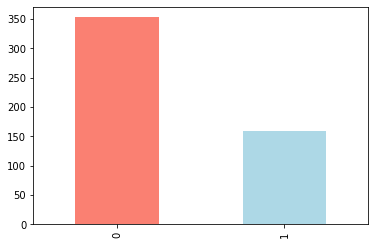

In [6]:
Urbanisation_data.risque_déforestation.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [7]:
Urbanisation_data.isna().sum()

region                                0
Date                                  0
Effectif de la population             0
Population rurale                     0
Population urbaine                    0
Taux d'urbanisation                   0
Nombre de ménages ruraux              0
Nombre de ménages urbains             0
Taille moyenne des ménages            0
Taille moyenne des ménages ruraux     0
Taille moyenne des ménages urbains    0
risque_déforestation                  0
dtype: int64

##### Sélection des variables continues 

In [8]:
Urbanisation_data = Urbanisation_data.drop(['region', 'Date'], axis= 1 ) 
Urbanisation_data.head()

,Effectif de la population,Population rurale,Population urbaine,Taux d'urbanisation,Nombre de ménages ruraux,Nombre de ménages urbains,Taille moyenne des ménages,Taille moyenne des ménages ruraux,Taille moyenne des ménages urbains,risque_déforestation
0,724461.69,27614.74,696846.95,96.19,2785.35,97871.76,7.55,9.91,7.12,1
1,759203.25,28805.87,730397.38,96.21,2928.70,101632.29,7.52,9.84,7.19,1
2,795610.84,30048.38,765562.46,96.22,3079.63,105546.30,7.48,9.76,7.25,1
3,833764.36,31344.49,802419.87,96.24,3238.55,109620.20,7.45,9.68,7.32,1
4,873747.53,32696.50,841051.03,96.26,3405.89,114397.58,7.42,9.60,7.35,1


### Matrice de corrélation 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(10.5, -0.5)

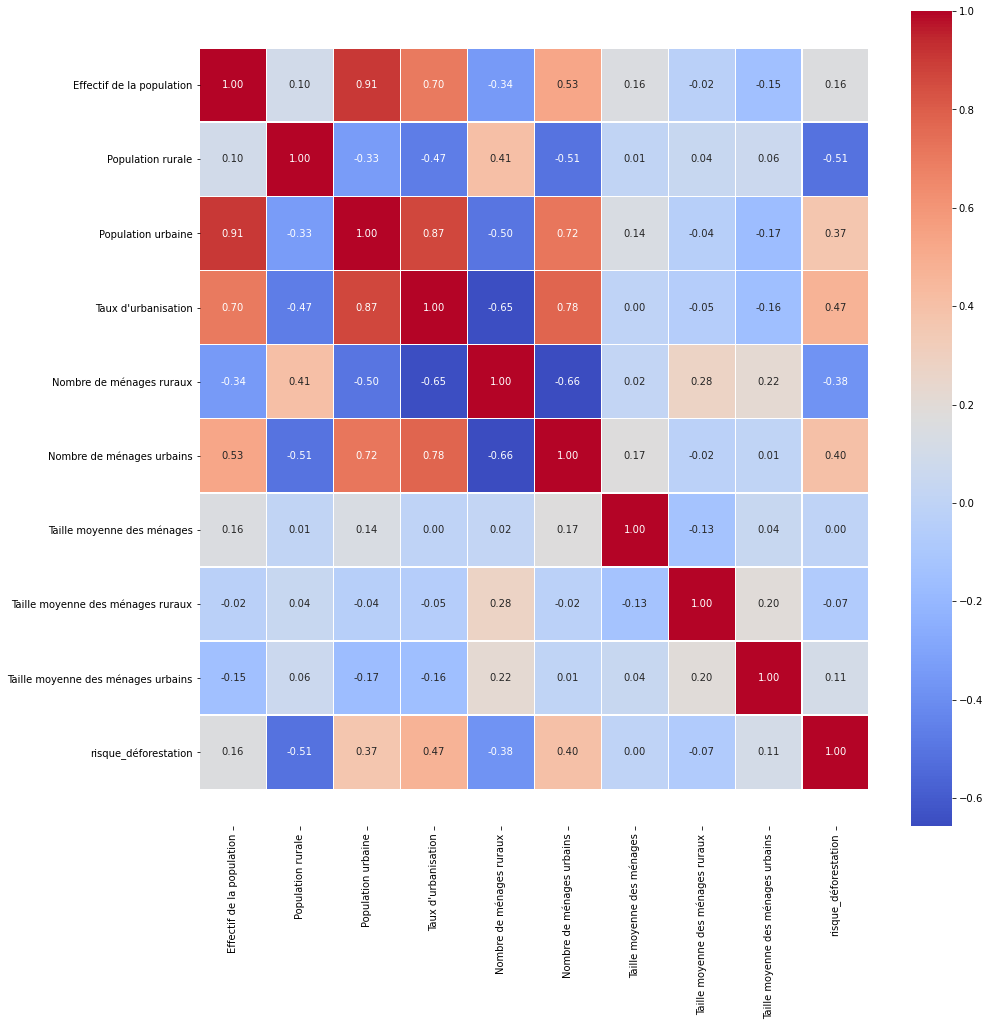

In [9]:
# Let's make our correlation matrix a little prettier
corr_matrix = Urbanisation_data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="coolwarm");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation avec la variable risque_déforestation'}>

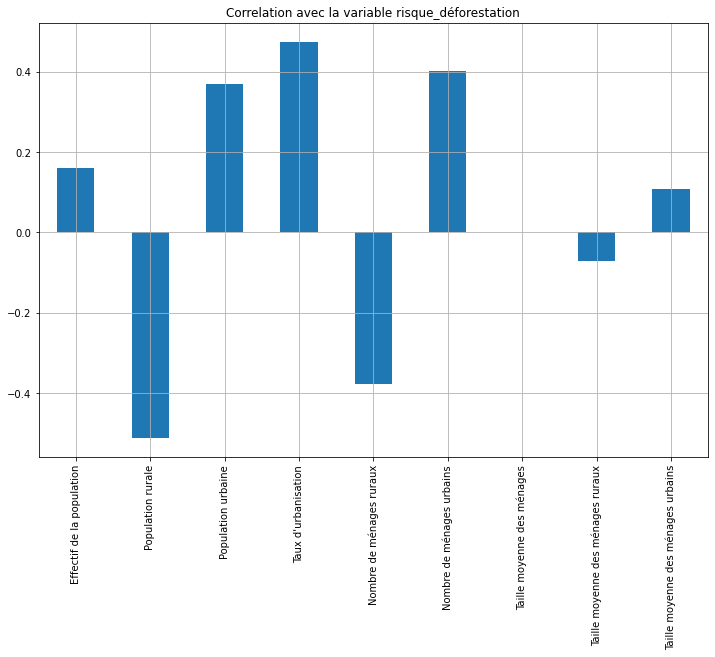

In [10]:
Urbanisation_data.drop('risque_déforestation', axis=1).corrwith(Urbanisation_data.risque_déforestation).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation avec la variable risque_déforestation")

##### Commentaires

- On voit les variables 'Population rurale', 'Population urbaine', 'Taux d'urbanisation' et 'Nombre de ménages urbains' sont plus correlées avec la variable 'risque_déforestation' contrairement aux autres.

- Donc les variables citées ci-dessus sont considérées comme de bons prédicteurs.  

##### Sélection des variables les plus  corrélées avec la variable cible

In [11]:
Selected_columns = ['Population rurale', 'Population urbaine',
       "Taux d'urbanisation", 'Nombre de ménages urbains', 'risque_déforestation']

In [12]:
Urbanisation_data = Urbanisation_data[Selected_columns]

### Transformation des données 

In [13]:
X = Urbanisation_data.drop(['risque_déforestation'], axis  = 1 ) 
y = Urbanisation_data.risque_déforestation

In [14]:
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
X = s_sc.fit_transform(X)

### Fractionner les données 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

### Appliquer du modèle RandomForest

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Trouver les paramètres optimaux du modèle 

In [25]:
rfc =RandomForestClassifier(random_state=42)

In [26]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [27]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [28]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

##### Application du modèle avec les paramètres optimaux obtenus

In [32]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, 
                            max_depth=8, criterion='entropy')
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
print_score(rfc1, X_train, y_train, X_test, y_test, train=True)
print_score(rfc1, X_train, y_train, X_test, y_test, train=False)

<IPython.core.display.Javascript object>

Train Result:
Accuracy Score: 98.60%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.99       0.99          0.99
recall      1.00   0.95      0.99       0.98          0.99
f1-score    0.99   0.98      0.99       0.98          0.99
support   247.00 111.00      0.99     358.00        358.00
_______________________________________________
Confusion Matrix: 
 [[247   0]
 [  5 106]]



<IPython.core.display.Javascript object>

Test Result:
Accuracy Score: 92.21%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.90  1.00      0.92       0.95          0.93
recall      1.00  0.75      0.92       0.88          0.92
f1-score    0.95  0.86      0.92       0.90          0.92
support   106.00 48.00      0.92     154.00        154.00
_______________________________________________
Confusion Matrix: 
 [[106   0]
 [ 12  36]]



##### Prédiction

In [35]:
def Prédiction(Value): 
    if Value == [1]: 
        print('PREDICTION : \n La région est fortement menacée par la déforestation')
    else:
        print('PREDICTION : \n La région est faiblement menacée par la déforestation')

In [36]:
Value = rfc1.predict([[468595.24, 64072.71, 12.03, 9206.00]])
Prédiction(Value)

PREDICTION : 
 La région est faiblement menacée par la déforestation
